# Data Mining: Predicting Survival rate of Titanic Passengers


### Overview

The data has been split into two groups:

- training set (train.csv)

- test set (test.csv)

The training set will be used to build the machine learning models. For the training set, the outcome (also known as the “ground truth”) for each passenger will be provided. 

The model will be based on “features” like passengers’ gender and class. 

You can also use feature engineering to create new features.

The test set should be used to see how well the model performs on unseen data. For the test set, the ground truth for each passenger will not be provided. 

It is our job to predict these outcomes. For each passenger in the test set, the model trained to predict whether or not they survived the sinking of the Titanic will be used.

> The gender_submission.csv is also included, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

### Data Dictionary

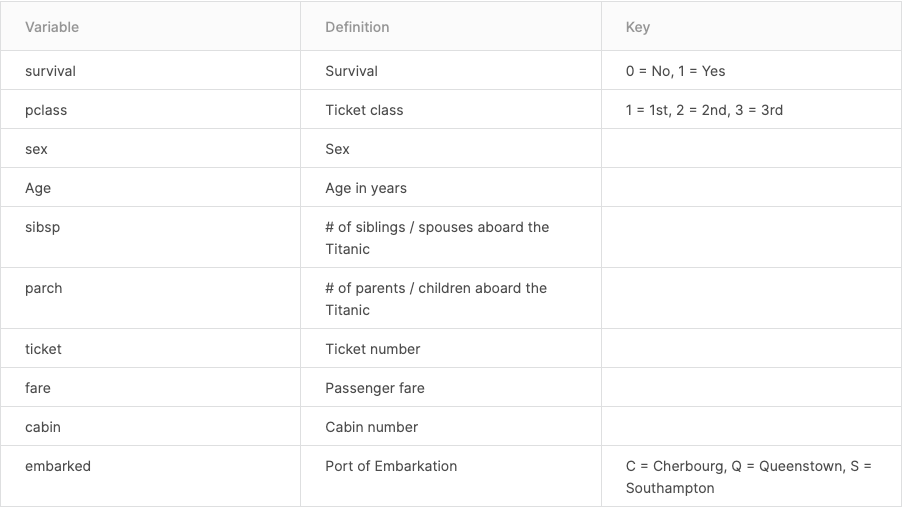

### Variable Notes

- pclass: A proxy for socio-economic status (SES)

> 1st = Upper

> 2nd = Middle

> 3rd = Lower

- age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5


- sibsp: The dataset defines family relations in this way...

> Sibling = brother, sister, stepbrother, stepsister

> Spouse = husband, wife (mistresses and fiancés were ignored)

- parch: The dataset defines family relations in this way...

> Parent = mother, father

> Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
# checking where null values exist in the data set
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Viiewing the data set information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# getting the null values of the age column
age_null = df.loc[df.Age.isna() == True]

In [8]:
# getting the null values of the cabin column
cabin_null = df.loc[df.Cabin.isna() == True]

In [9]:
# Columns to be deleted
drop_col = df[['PassengerId','Name', 'Ticket', 'Cabin', 'Embarked']]

In [10]:
col_df = df.drop(drop_col, axis=1)

In [11]:
col_df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [12]:
# Since age is a major feature in the data set, all row with age as NaN will be removed to imporove the accuracy of model
col_df = col_df.dropna()

In [13]:
col_df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [14]:
# computing the correlation of the entire data set to check relationship
corr = col_df.corr()

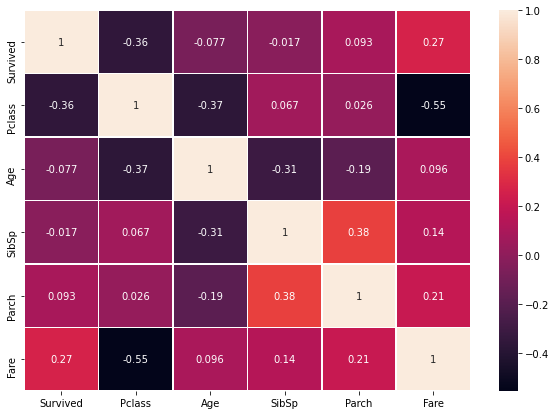

In [15]:
fig = plt.figure(figsize=[10, 7])
sns.heatmap(corr, annot=True, linewidths=0.5,);

### Observation:

- The Pclass and those that survived have a negative correlation

- The Fare and Pclass also have a negative correlation

In [16]:
# computing the measures of center
col_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


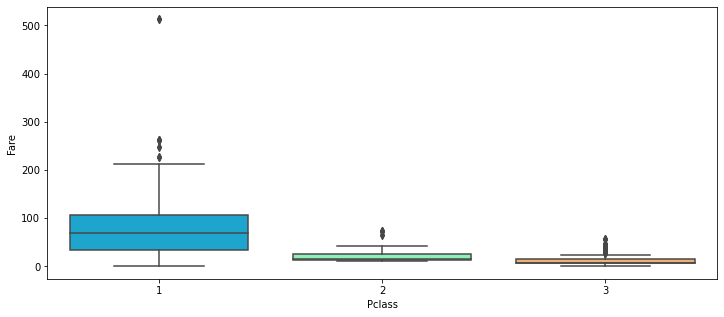

In [17]:
# plotting Fare with the Pclass of the passengers using boxplot to view outliers
plt.figure(figsize=(12,5))
sns.boxplot(x="Pclass", y="Fare", data=col_df, palette='rainbow');

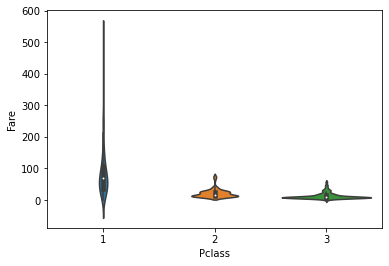

In [18]:
#Plotting Fare with the Pclass of the passengers
sns.violinplot(x="Pclass", y="Fare", data=col_df,size=8);

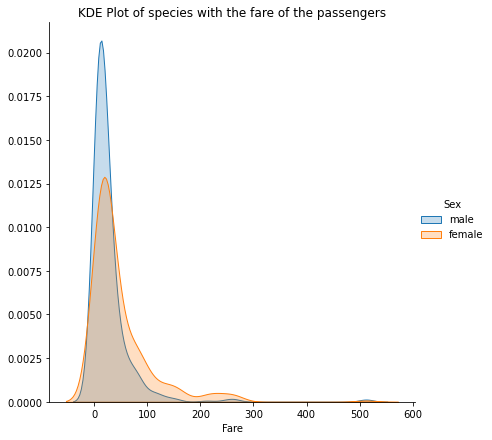

In [19]:
#KDE Plot of species with the fare of the passengers
sns.FacetGrid(col_df, hue="Sex", size=6,) \
   .map(sns.kdeplot, "Fare",shade=True) \
   .add_legend().set(title='KDE Plot of species with the fare of the passengers');

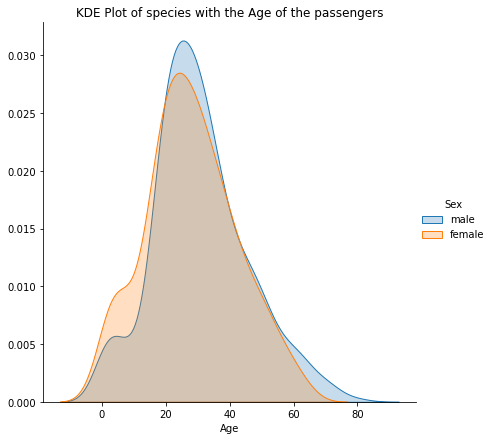

In [20]:
#KDE Plot of species with the Age of the passengers
sns.FacetGrid(col_df, hue="Sex", size=6,) \
   .map(sns.kdeplot, "Age",shade=True) \
   .add_legend().set(title='KDE Plot of species with the Age of the passengers');

In [21]:
col_df.sample(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
695,0,2,male,52.0,0,0,13.5000
514,0,3,male,24.0,0,0,7.4958
664,1,3,male,20.0,1,0,7.9250
57,0,3,male,28.5,0,0,7.2292
193,1,2,male,3.0,1,1,26.0000
494,0,3,male,21.0,0,0,8.0500
370,1,1,male,25.0,1,0,55.4417
11,1,1,female,58.0,0,0,26.5500
165,1,3,male,9.0,0,2,20.5250
882,0,3,female,22.0,0,0,10.5167


In [22]:
# converting the categorical columns to numerical column using label encoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [23]:
col_df['Sex'] = label_encoder.fit_transform(col_df['Sex'])

In [24]:
col_df #1 stands for male while 0 stands for female

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.1250
886,0,2,1,27.0,0,0,13.0000
887,1,1,0,19.0,0,0,30.0000
889,1,1,1,26.0,0,0,30.0000


### *The ML Algorithm to be used for model is Logistic Regression because the dependent variable is binary.*

- Logistic Regression is a go-to method for binary classification problems in statistics. 

- It is a special case of linear regression where the target variable is categorical in nature. 

In [25]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, classification_report

In [26]:
scaler = StandardScaler()

In [27]:
#Dviding the dataset into features (X) and target (y)
X = col_df.drop('Survived', axis=1)
feature_col = X.columns # Extracting the names of columns in dataset
y = col_df.Survived

In [28]:
# Uisng Standard Scaler to transform data
X = pd.DataFrame(scaler.fit_transform(X))
X.columns = feature_col # Adding column title to dataset
X.sample(10)

,Pclass,Sex,Age,SibSp,Parch,Fare
416,-1.476364,-1.317434,0.985159,-0.551703,0.666862,0.440315
115,-0.282566,0.759051,-0.805929,-0.551703,-0.505895,-0.438610
564,-1.476364,-1.317434,-0.392601,-0.551703,-0.505895,0.280052
197,-1.476364,0.759051,0.985159,1.600843,-0.505895,1.045831
65,0.911232,-1.317434,0.227391,2.677117,-0.505895,-0.356351
383,0.911232,0.759051,-1.425920,4.829663,1.839619,0.230807
451,-0.282566,0.759051,2.225142,-0.551703,-0.505895,-0.457520
460,-1.476364,-1.317434,0.640719,0.524570,0.666862,1.440736
609,-1.476364,-1.317434,0.434055,0.524570,1.839619,1.613133
216,-1.476364,-1.317434,1.949591,-0.551703,0.666862,2.245912


In [29]:
#spliting data into test and train data for the machine learning model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=72)

In [30]:
# Using the Logistic Regression Algorithm to predict model
log_model = LogisticRegression()

In [31]:
log_model.fit(X_train, y_train)

LogisticRegression()

In [32]:
y_pred = log_model.predict(X_test)

In [33]:
# Computing the accuracy of the model
y_accuracy = confusion_matrix(y_test, y_pred)
print('The Accuracy of Logistic Regression Model: \n', y_accuracy)

The Accuracy of Logistic Regression Model: 
 [[117  21]
 [ 20  57]]


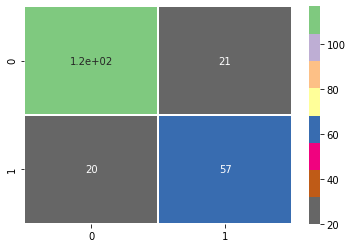

In [34]:
#visualizing the model prediction using a heatmap
sns.heatmap(y_accuracy, cmap='Accent_r', annot=True, linewidths=0.5);

In [35]:
matrix = classification_report(y_test, y_pred)
print('Classification Report for the Logistic Regression Model: \n', matrix)

Classification Report for the Logistic Regression Model: 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       138
           1       0.73      0.74      0.74        77

    accuracy                           0.81       215
   macro avg       0.79      0.79      0.79       215
weighted avg       0.81      0.81      0.81       215



In [36]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('The true Negative for the Logistic Regression model is', tn)
print('False Positive for the Logistic Regression model is', fp)
print('False Negative for the Logistic Regression model is', fn)
print('True Positive for the Logistic Regression model is', tp)

The true Negative for the Logistic Regression model is 117
False Positive for the Logistic Regression model is 21
False Negative for the Logistic Regression model is 20
True Positive for the Logistic Regression model is 57


### *The logistic model has a prediction accuracy of 81% based on analyzing the data of 215 passengers*

In [37]:
# Using the Random Forest Classifier Algorithm to predict model
rfc_model = RandomForestClassifier()

In [38]:
rfc_model.fit(X_train, y_train)

RandomForestClassifier()

In [39]:
y_pred = rfc_model.predict(X_test)

In [40]:
# Computing the accuracy of the model
y_accuracy = confusion_matrix(y_test, y_pred)
print('The Accuracy of Random Forest Classifier Model: \n', y_accuracy)

The Accuracy of Random Forest Classifier Model: 
 [[118  20]
 [ 21  56]]


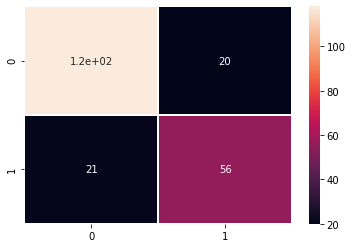

In [41]:
#visualizing the model prediction using a heatmap
sns.heatmap(y_accuracy, annot=True, linewidths=0.5);

In [42]:
matrix = classification_report(y_test, y_pred)
print('Classification Report for the Random Forest Classifier Model: \n', matrix)

Classification Report for the Random Forest Classifier Model: 
               precision    recall  f1-score   support

           0       0.85      0.86      0.85       138
           1       0.74      0.73      0.73        77

    accuracy                           0.81       215
   macro avg       0.79      0.79      0.79       215
weighted avg       0.81      0.81      0.81       215



In [43]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('True Negative for the Random Forest Classifier model is', tn)
print('False Negative for the Random Forest Classifier model is', fn)
print('True Positive for the Random Forest Classifier model is', tp)
print('False Positive for the Random Forest Classifier model is', fp)

True Negative for the Random Forest Classifier model is 118
False Negative for the Random Forest Classifier model is 21
True Positive for the Random Forest Classifier model is 56
False Positive for the Random Forest Classifier model is 20


### *The logistic model has a prediction accuracy of 81% based on analyzing the data of 215 passengers*

In [103]:
kn_model = KNeighborsClassifier(n_neighbors=4)

In [104]:
kn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [105]:
y_pred = kn_model.predict(X_test)

In [106]:
# Computing the accuracy of the model
y_accuracy = confusion_matrix(y_test, y_pred)
print('The Accuracy of Random Forest Classifier Model: \n', y_accuracy)

The Accuracy of Random Forest Classifier Model: 
 [[127  11]
 [ 21  56]]


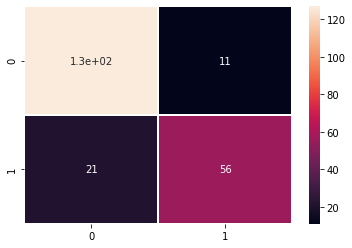

In [107]:
#visualizing the model prediction using a heatmap
sns.heatmap(y_accuracy, annot=True, linewidths=0.5);

In [108]:
matrix = classification_report(y_test, y_pred)
print('Classification Report for the KNeighbour Classifier Model: \n', matrix)

Classification Report for the KNeighbour Classifier Model: 
               precision    recall  f1-score   support

           0       0.86      0.92      0.89       138
           1       0.84      0.73      0.78        77

    accuracy                           0.85       215
   macro avg       0.85      0.82      0.83       215
weighted avg       0.85      0.85      0.85       215



In [109]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('True Negative for the Random Forest Classifier model is', tn)
print('False Negative for the Random Forest Classifier model is', fn)
print('True Positive for the Random Forest Classifier model is', tp)
print('False Positive for the Random Forest Classifier model is', fp)

True Negative for the Random Forest Classifier model is 127
False Negative for the Random Forest Classifier model is 21
True Positive for the Random Forest Classifier model is 56
False Positive for the Random Forest Classifier model is 11


### *The KNeighbour Classifier Model has a prediction accuracy of 85% based on analyzing the data of 215 passengers*

In [51]:
svm_model = SVC()

In [52]:
svm_model.fit(X_train, y_train)

SVC()

In [53]:
y_pred = svm_model.predict(X_test)

In [54]:
# Computing the accuracy of the model
y_accuracy = confusion_matrix(y_test, y_pred)
print('The Accuracy of Support Vector Classifier Model: \n', y_accuracy)

The Accuracy of Support Vector Classifier Model: 
 [[125  13]
 [ 21  56]]


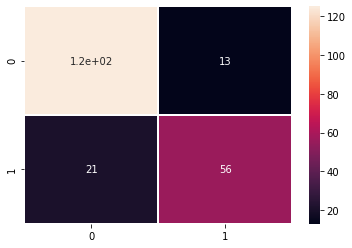

In [55]:
#visualizing the model prediction using a heatmap
sns.heatmap(y_accuracy, annot=True, linewidths=0.5);

In [56]:
matrix = classification_report(y_test, y_pred)
print('Classification Report for the Support Vector Classifier Model: \n', matrix)

Classification Report for the Support Vector Classifier Model: 
               precision    recall  f1-score   support

           0       0.86      0.91      0.88       138
           1       0.81      0.73      0.77        77

    accuracy                           0.84       215
   macro avg       0.83      0.82      0.82       215
weighted avg       0.84      0.84      0.84       215



In [57]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('True Negative for the Random Forest Classifier model is', tn)
print('False Negative for the Random Forest Classifier model is', fn)
print('True Positive for the Random Forest Classifier model is', tp)
print('False Positive for the Random Forest Classifier model is', fp)

True Negative for the Random Forest Classifier model is 125
False Negative for the Random Forest Classifier model is 21
True Positive for the Random Forest Classifier model is 56
False Positive for the Random Forest Classifier model is 13


### *The Support Vector Classifier Model has a prediction accuracy of 84% based on analyzing the data of 215 passengers*

### Observation:

- Comapring the Logistic Regression Model, Random Forest Classifier, KNeighbours Classifier and Support Vector Classifier, the model accuracies are as follows:

> Support Vector Classifier model has 84% accuracy score

> KNeighbour Classifier model has 85% accuracy score

> Random Forest Classifier and Logistic Regression both had an accuracy score of 81%

### *Using the best model (Support Vector Classifier) to predict the survival of passengers*

In [58]:
test = pd.read_csv('test.csv')

In [59]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [60]:
# Transforming the categorical column to numerical variable
test['Sex'] = label_encoder.fit_transform(test['Sex']) #0 stands for male while 1 stands for female

In [120]:
drop = test[['PassengerId','Name', 'Ticket', 'Cabin', 'Embarked']]

In [62]:
#Filtering the dataset by selecting columns to remove
test_df = test.drop(drop, axis=1)

In [63]:
# filling all the missing values in the dataset
test_df = test_df.fillna(method='ffill')

In [64]:
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,34.5,0,0,7.8292
1,3,0,47.0,1,0,7.0000
2,2,1,62.0,0,0,9.6875
3,3,1,27.0,0,0,8.6625
4,3,0,22.0,1,1,12.2875
...,...,...,...,...,...,...
413,3,1,28.0,0,0,8.0500
414,1,0,39.0,0,0,108.9000
415,3,1,38.5,0,0,7.2500
416,3,1,38.5,0,0,8.0500


In [65]:
#Using the Support Vector Classifier to predict the survival of passengers
svm_pred = svm_model.predict(test_df)

In [66]:
survived = pd.DataFrame(svm_pred)

In [67]:
svm_survived = pd.concat([test.PassengerId, survived], axis=1)
svm_survived.columns = ['PassengerId', 'Survived']

In [68]:
svm_survived.sample(10)

,PassengerId,Survived
279,1171,0
61,953,0
397,1289,0
408,1300,0
185,1077,0
156,1048,0
122,1014,0
342,1234,0
240,1132,0
373,1265,0


### Observation:

The Support Vector Model Predicted that all the passengers whose detail were in the data set. didn't survive the crash

In [69]:
# saving the dataframe
svm_survived.to_csv('svm_survived.csv', index=False)

### *Using the KNeighbour Classifier Model to predict the survival of passengers*

In [110]:
kn_pred = kn_model.predict(test_df)

In [111]:
survived = pd.DataFrame(kn_pred)

In [112]:
kn_survived = pd.concat([test.PassengerId, survived], axis=1)
kn_survived.columns = ['PassengerId', 'Survived']

In [117]:
kn_survived.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,1
6,898,0
7,899,1
8,900,0
9,901,1


In [114]:
kn_survived.Survived.value_counts()

1    215
0    203
Name: Survived, dtype: int64

### Observation:

The KNeighbour Classifier Model Predicted that 215 passengers survived the crash while 203 passengers died.

In [116]:
# saving the dataframe
kn_survived.to_csv('kn_survived.csv',index=False)